<a href="https://colab.research.google.com/github/TAFIMnoor/Understanding-Bengali-NLP-LSTM-XGBoost-MultinomialNB/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive/My\ Drive/archive.zip

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the parameters for image preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.3
)


In [7]:
data_dir = '/content/brain_tumor_dataset'
batch_size = 32

In [8]:

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training' 
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation' 
)


Found 178 images belonging to 2 classes.
Found 75 images belonging to 2 classes.


In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 128)     

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
6/6 [==============================] - 3s 564ms/step - loss: 0.4285 - accuracy: 0.8034 - val_loss: 0.6732 - val_accuracy: 0.6800
Epoch 2/10
6/6 [==============================] - 6s 1s/step - loss: 0.4520 - accuracy: 0.8146 - val_loss: 0.6246 - val_accuracy: 0.7467
Epoch 3/10
6/6 [==============================] - 3s 538ms/step - loss: 0.4783 - accuracy: 0.8034 - val_loss: 0.5082 - val_accuracy: 0.7867
Epoch 4/10
6/6 [==============================] - 5s 937ms/step - loss: 0.4276 - accuracy: 0.7978 - val_loss: 0.5428 - val_accuracy: 0.7867
Epoch 5/10
6/6 [==============================] - 3s 543ms/step - loss: 0.4190 - accuracy: 0.8427 - val_loss: 0.6111 - val_accuracy: 0.7200
Epoch 6/10
6/6 [==============================] - 4s 589ms/step - loss: 0.4109 - accuracy: 0.8146 - val_loss: 0.5145 - val_accuracy: 0.7600
Epoch 7/10
6/6 [==============================] - 5s 829ms/step - loss: 0.4198 - accuracy: 0.7809 - val_loss: 0.5865 - val_accuracy: 0.7333
Epoch 8/10
6/6 [=======

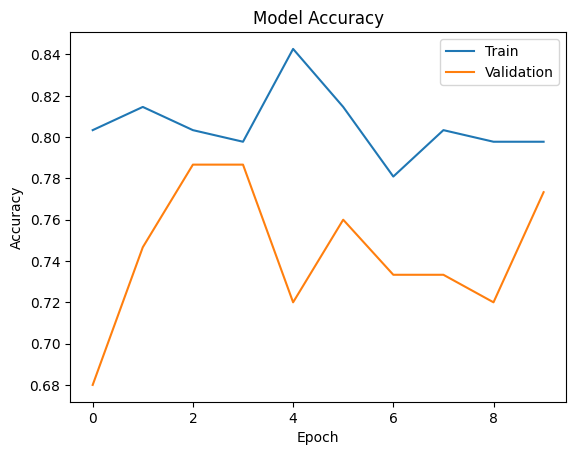

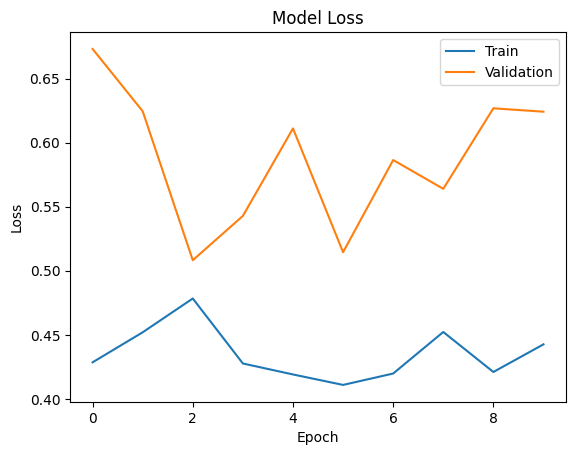

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()